# 📉 Gradient Descent and Its Variants

---

## 📘 What Is Gradient Descent?

**Gradient Descent** is an **optimization algorithm** used to minimize a model’s loss function by **iteratively adjusting the model parameters** (weights and biases) in the **direction of the negative gradient**.

Mathematically:
\[
\theta = \theta - \eta \frac{\partial L}{\partial \theta}
\]
where:
- \( \theta \): model parameters (weights, biases)
- \( \eta \): learning rate
- \( \frac{\partial L}{\partial \theta} \): gradient of the loss function with respect to parameters

The goal is to find the parameter values that **minimize the loss**.

---

## ⚙️ Variants of Gradient Descent

Gradient Descent can be implemented in different ways depending on **how much data** is used to compute the gradient at each step.

---

### 🔹 Batch Gradient Descent

- **Definition:** Uses the **entire dataset** to compute gradients before performing a single update.
- **Equation:**
  \[
  \theta = \theta - \eta \cdot \frac{1}{N} \sum_{i=1}^{N} \frac{\partial L_i}{\partial \theta}
  \]
- **Pros:**
  - Produces **accurate and stable gradients**
  - Converges smoothly
- **Cons:**
  - **Computationally expensive** for large datasets
  - Slow convergence when data doesn’t fit in memory

💡 *Best suited for smaller datasets where computation cost is manageable.*

---

### 🔹 Stochastic Gradient Descent (SGD)

- **Definition:** Updates model parameters **for each data point individually**.
- **Equation:**
  \[
  \theta = \theta - \eta \cdot \frac{\partial L_i}{\partial \theta}
  \]
- **Pros:**
  - **Faster updates** (since only one sample is used)
  - Can escape local minima due to randomness
- **Cons:**
  - **High variance** in updates → may cause oscillations
  - Requires careful tuning of the learning rate

💡 *Commonly used for large datasets; ideal for online learning and streaming data.*

---

### 🔹 Mini-Batch Gradient Descent

- **Definition:** A compromise between batch and SGD — computes gradients using **small batches** (e.g., 32–256 samples).
- **Equation:**
  \[
  \theta = \theta - \eta \cdot \frac{1}{m} \sum_{i=1}^{m} \frac{\partial L_i}{\partial \theta}
  \]
- **Pros:**
  - Balances speed and stability  
  - Exploits vectorization on GPUs  
  - Reduces noise in updates
- **Cons:**
  - Requires choosing the right batch size

💡 *The most widely used variant in deep learning frameworks.*

---

## 💻 Example: Comparing Variants

```python
import numpy as np

# Simple loss function: L = (theta - 3)^2
def loss(theta):
    return (theta - 3)**2

def grad(theta):
    return 2 * (theta - 3)

# Initialize parameter
theta = 0.0
lr = 0.1

# Simulate Gradient Descent steps
for step in range(10):
    theta -= lr * grad(theta)
    print(f"Step {step+1}: theta = {theta:.4f}, loss = {loss(theta):.4f}")


# 🚀 Advanced Optimization Techniques

---

## 📘 Overview

While **basic Gradient Descent** updates all parameters with the same learning rate,  
**advanced optimizers** dynamically adjust learning rates based on gradient history and momentum — improving convergence speed and stability.

---

## ⚙️ 1. Adagrad (Adaptive Gradient Algorithm)

### 🔹 Concept
Adagrad adapts the **learning rate** for each parameter individually based on the **accumulated squared gradients**.

### 🧮 Update Rule

\[
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
\]

where:
- \( G_t = \sum_{i=1}^{t} g_i^2 \) → accumulated squared gradients  
- \( g_t \) = current gradient  
- \( \eta \) = initial learning rate  
- \( \epsilon \) = small constant to prevent division by zero  

### ✅ Pros
- Automatically scales the learning rate per parameter  
- Great for **sparse data** (e.g., NLP embeddings)

### ⚠️ Cons
- Learning rate **shrinks too much** over time → stops learning early

### 💻 Example

```python
# Pseudocode for Adagrad update
cache += grad ** 2
theta -= lr * grad / (np.sqrt(cache) + 1e-8)


# 🚀 Advanced Optimization Techniques

---

## 📘 Overview

While **basic Gradient Descent** updates all parameters with the same learning rate,  
**advanced optimizers** dynamically adjust learning rates based on gradient history and momentum — improving convergence speed and stability.

---

## ⚙️ 1. Adagrad (Adaptive Gradient Algorithm)

### 🔹 Concept
Adagrad adapts the **learning rate** for each parameter individually based on the **accumulated squared gradients**.

### 🧮 Update Rule

\[
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
\]

where:
- \( G_t = \sum_{i=1}^{t} g_i^2 \) → accumulated squared gradients  
- \( g_t \) = current gradient  
- \( \eta \) = initial learning rate  
- \( \epsilon \) = small constant to prevent division by zero  

### ✅ Pros
- Automatically scales the learning rate per parameter  
- Great for **sparse data** (e.g., NLP embeddings)

### ⚠️ Cons
- Learning rate **shrinks too much** over time → stops learning early

### 💻 Example

```python
# Pseudocode for Adagrad update
cache += grad ** 2
theta -= lr * grad / (np.sqrt(cache) + 1e-8)


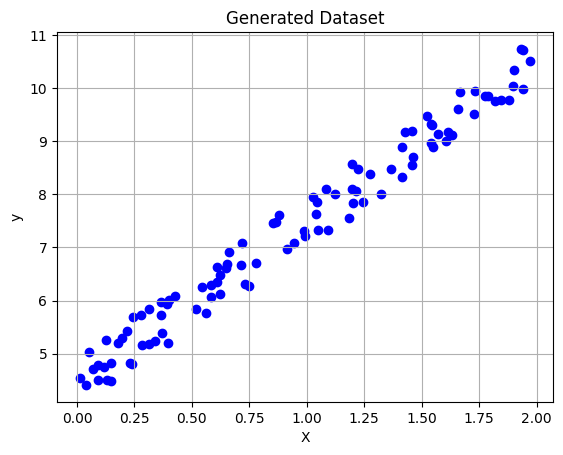

Optimized Parameters (Theta): [[4.51359766]
 [2.98323418]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 +3 * X + np.random.rand(100, 1)

plt.scatter(X, y, color = 'blue')
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

m = 100
theta = np.random.rand(2, 1)
learning_rate = 0.1
iterations = 1000

X_b = np.c_[np.ones((m,1)), X]

for epoch in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate*gradients

print("Optimized Parameters (Theta):", theta)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

X = 2 * np.random.rand(100, 1)
y =   np.random.rand(100, 1)

X_ = torch.tensor(X, dtype = torch.float32)
y_ = torch.tensor(y, dtype=torch.float32)

class LinearModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)
    
model_torch = LinearModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr = 0.1)

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model_torch(X_)
    loss = criterion(outputs, y_)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss: .4f}")

Epoch 0, Loss:  0.2126
Epoch 10, Loss:  0.0778
Epoch 20, Loss:  0.0874
Epoch 30, Loss:  0.0768
Epoch 40, Loss:  0.0779
Epoch 50, Loss:  0.0767
Epoch 60, Loss:  0.0766
Epoch 70, Loss:  0.0766
Epoch 80, Loss:  0.0765
Epoch 90, Loss:  0.0765
Epoch 100, Loss:  0.0765
Epoch 110, Loss:  0.0765
Epoch 120, Loss:  0.0765
Epoch 130, Loss:  0.0765
Epoch 140, Loss:  0.0765
Epoch 150, Loss:  0.0765
Epoch 160, Loss:  0.0765
Epoch 170, Loss:  0.0765
Epoch 180, Loss:  0.0765
Epoch 190, Loss:  0.0765
Epoch 200, Loss:  0.0765
Epoch 210, Loss:  0.0765
Epoch 220, Loss:  0.0765
Epoch 230, Loss:  0.0765
Epoch 240, Loss:  0.0765
Epoch 250, Loss:  0.0765
Epoch 260, Loss:  0.0765
Epoch 270, Loss:  0.0765
Epoch 280, Loss:  0.0765
Epoch 290, Loss:  0.0765
Epoch 300, Loss:  0.0765
Epoch 310, Loss:  0.0765
Epoch 320, Loss:  0.0765
Epoch 330, Loss:  0.0765
Epoch 340, Loss:  0.0765
Epoch 350, Loss:  0.0765
Epoch 360, Loss:  0.0765
Epoch 370, Loss:  0.0765
Epoch 380, Loss:  0.0765
Epoch 390, Loss:  0.0765
Epoch 400, 

In [25]:
X_

tensor([[1.4729],
        [1.8687],
        [1.8511],
        [0.9017],
        [0.2265],
        [1.9697],
        [1.6778],
        [0.2493],
        [1.8417],
        [1.7398],
        [1.0377],
        [1.1826],
        [0.7980],
        [0.1095],
        [0.6704],
        [1.6057],
        [0.0093],
        [0.6670],
        [0.7963],
        [1.0748],
        [1.8397],
        [0.6927],
        [0.6939],
        [1.4750],
        [0.9044],
        [0.4492],
        [0.9049],
        [0.2817],
        [0.3528],
        [0.9967],
        [0.8379],
        [1.8297],
        [0.7248],
        [1.1612],
        [1.2645],
        [0.0262],
        [1.3271],
        [0.3561],
        [1.9221],
        [0.2973],
        [0.8292],
        [0.1707],
        [1.9937],
        [1.0044],
        [1.1908],
        [0.1342],
        [1.4999],
        [0.4198],
        [1.7961],
        [0.4103],
        [0.3814],
        [0.0731],
        [0.9441],
        [1.1297],
        [0.1314],
        [1

In [26]:
y_

tensor([[0.8927],
        [0.8174],
        [0.3418],
        [0.2594],
        [0.3797],
        [0.5903],
        [0.2681],
        [0.6241],
        [0.4094],
        [0.5520],
        [0.4361],
        [0.2945],
        [0.9485],
        [0.7636],
        [0.1401],
        [0.8685],
        [0.4874],
        [0.8946],
        [0.7999],
        [0.4252],
        [0.0225],
        [0.2687],
        [0.5416],
        [0.6335],
        [0.2579],
        [0.1394],
        [0.8349],
        [0.9844],
        [0.5257],
        [0.1717],
        [0.2723],
        [0.0184],
        [0.9143],
        [0.1178],
        [0.5765],
        [0.2741],
        [0.5542],
        [0.6514],
        [0.8297],
        [0.2064],
        [0.0110],
        [0.1369],
        [0.9000],
        [0.8739],
        [0.5974],
        [0.6005],
        [0.6650],
        [0.1754],
        [0.9144],
        [0.4188],
        [0.3831],
        [0.5189],
        [0.0470],
        [0.1663],
        [0.7380],
        [0

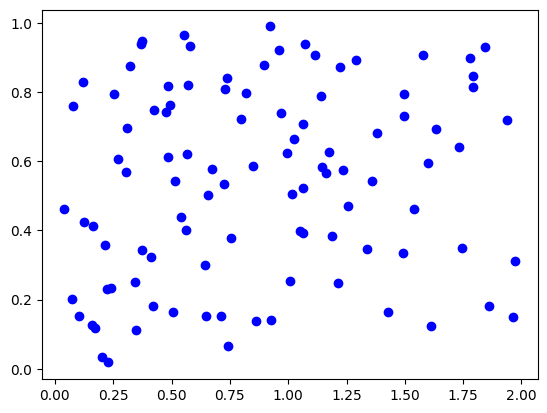

In [19]:
plt.scatter(X_, y_, color='blue')
plt.show()

In [21]:
X_[0]

tensor([1.4729])

In [23]:
with torch.no_grad():
    output2 = model_torch(X_[0])

In [24]:
output2

tensor([0.5121])

In [27]:
y_[0]

tensor([0.8927])